# Time Series Modelling of Stock Data
#### Performing Univariate and Multivariate Time Series Analysis 
##### on Stock Data of Reliance Industries from the date '2020-04-01' to '2022-03-30'

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

##### Importing the DataSet

In [3]:
df = pd.read_csv('RELIANCE.csv')
df.rename(columns= {"Date" : "date","Open" : "open" , "High" : "high" , "Low":"low","Close":"close","Adj Close":"adj_close","Volume":"volume"},inplace= True)
df['date'] = pd.to_datetime(df['date'])
df.tail()

,date,open,high,low,close,adj_close,volume
491,2022-03-24,2510.000000,2584.149902,2510.000000,2578.649902,2570.909668,6077153
492,2022-03-25,2582.500000,2616.000000,2577.000000,2595.850098,2588.058105,6563676
493,2022-03-28,2610.000000,2629.750000,2586.500000,2621.949951,2614.079590,4564891
494,2022-03-29,2638.000000,2638.000000,2607.399902,2622.550049,2614.677979,4007695
495,2022-03-30,2639.899902,2688.000000,2617.100098,2672.949951,2664.926514,7297028


##### Checking for Missing Values and Zeroes

In [4]:
null_values = df.isnull().sum()
NaN_values = df.isna().sum()
zero_values = 0 in df

print( 'Null values in Stock Data = ','\n', null_values)
print( 'NaN values in Stock Data = ','\n', NaN_values)
print( 'Zeroes in Stock Data = ', zero_values)

Null values in Stock Data =  
 date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64
NaN values in Stock Data =  
 date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64
Zeroes in Stock Data =  False


##### Exploratory Data Analysis

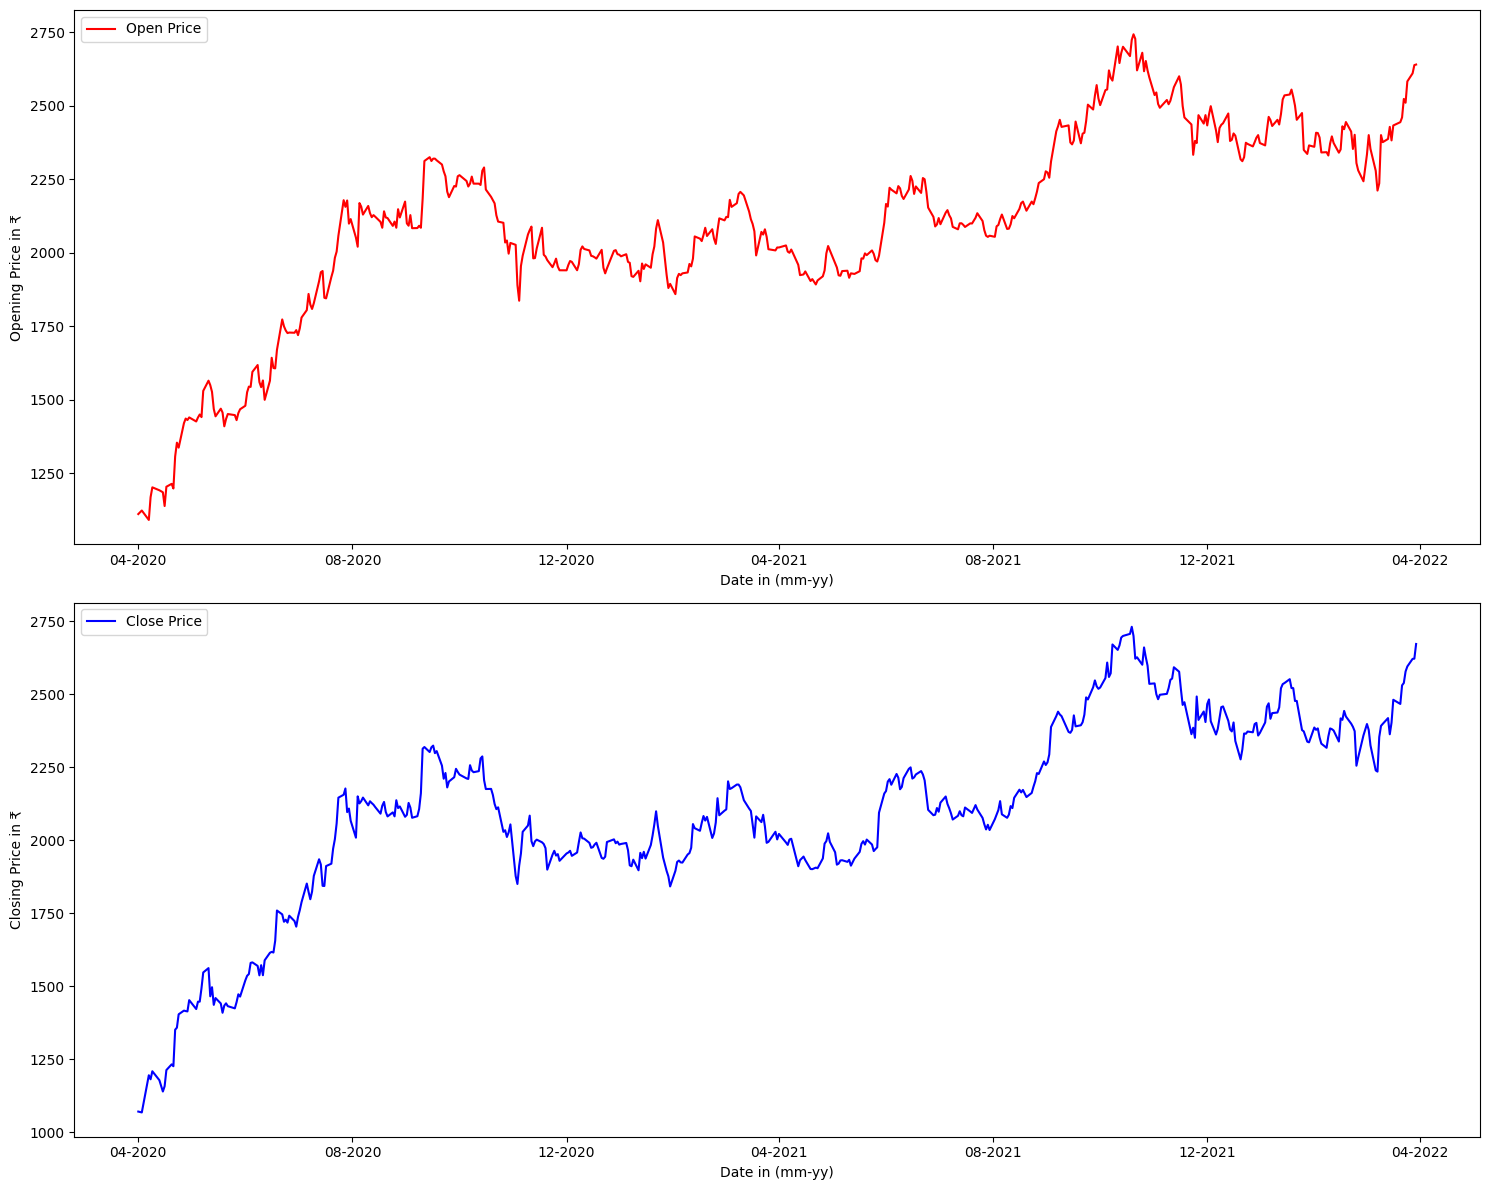

In [5]:
fig , (ax1,ax2) = plt.subplots(2,figsize = (15,12))
ax1.plot(df['date'],df['open'], color = 'red' , label = 'Open Price')
ax1.set_xlabel('Date in (mm-yy)')
ax1.set_ylabel('Opening Price in ₹')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
ax1.legend(loc = 'upper left')

ax2.plot(df['date'],df['close'], color = 'blue',label = 'Close Price')
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
ax2.set_xlabel('Date in (mm-yy)')
ax2.set_ylabel('Closing Price in ₹')
ax2.legend(loc = 'upper left')
fig.tight_layout()

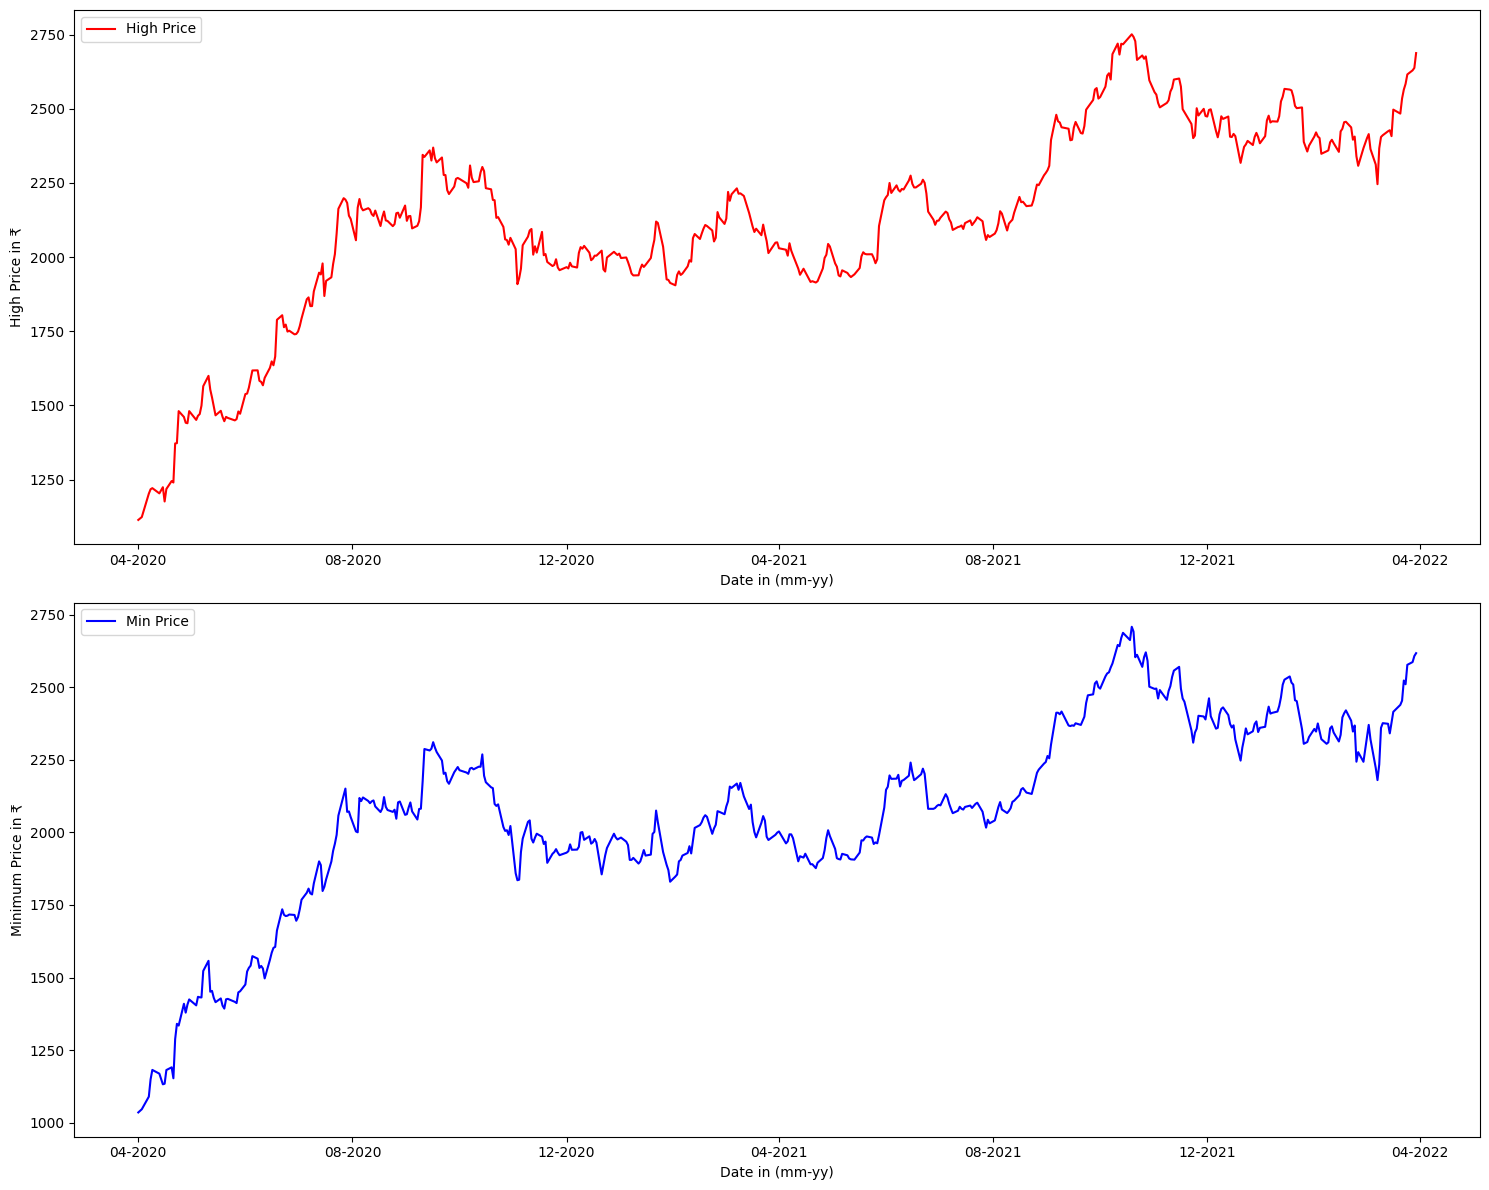

In [6]:
fig , (ax0,ax_1) = plt.subplots(2,figsize = (15,12))
ax0.plot(df['date'],df['high'], color = 'red' , label = 'High Price')
ax0.set_xlabel('Date in (mm-yy)')
ax0.set_ylabel('High Price in ₹')
ax0.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
ax0.legend(loc = 'upper left')


ax_1.plot(df['date'],df['low'], color = 'blue',label = 'Min Price')
ax_1.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax_1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
ax_1.set_xlabel('Date in (mm-yy)')
ax_1.set_ylabel('Minimum Price in ₹')
ax_1.legend(loc = 'upper left')

fig.tight_layout()

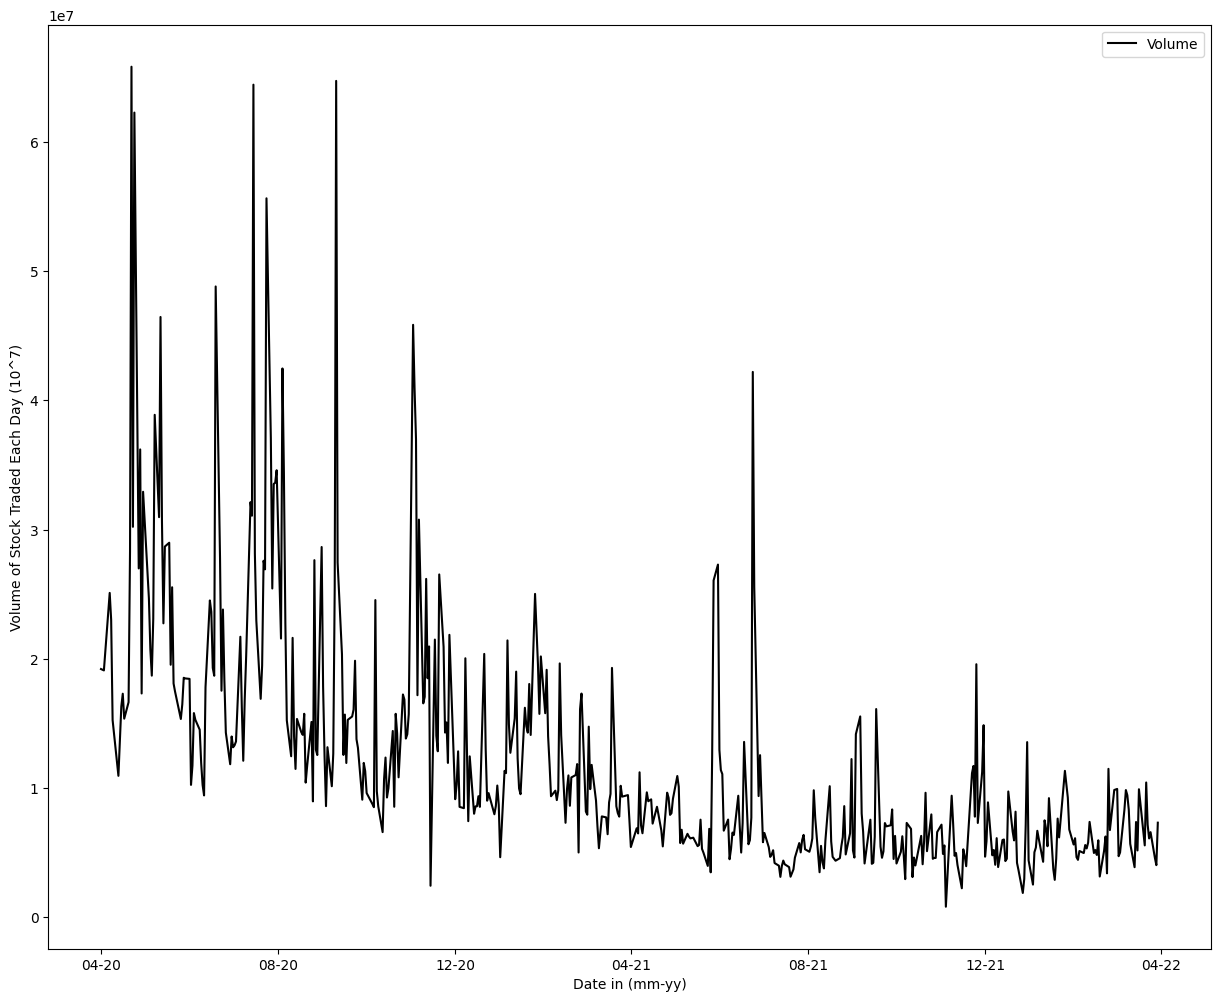

In [7]:
fig , ax = plt.subplots(figsize = (15,12))
ax.plot(df['date'],df['volume'],color = 'black',label = 'Volume')
ax.set_xlabel('Date in (mm-yy)')
ax.set_ylabel('Volume of Stock Traded Each Day (10^7)')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))
ax.legend(loc = 'upper right')

In [8]:

monthwise = df.groupby(df['date'].dt.strftime('%B'))[['open','close']].mean()
# order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
#              'September', 'October', 'November', 'December']
# monthwise.index.names = ['month']
# monthwise = monthwise.reindex(order)
# monthwise

In [9]:
monthwise

,open,close
date,,
April,1618.011712,1620.000185
August,2133.409526,2132.051206
December,2193.554441,2187.955561
February,2185.546249,2189.625003
January,2209.028751,2204.722519
July,2012.829543,2012.175004
June,1910.361367,1910.252264
March,2263.591457,2269.700008
May,1723.354661,1722.790518


In [10]:

monthwise_max = df.groupby(df['date'].dt.strftime('%B'))[['open','close']].max()
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthwise_max.index.names = ['month']
monthwise_max = monthwise_max.reindex(order)
monthwise_max

,open,close
month,,
January,2554.750000,2552.250000
February,2444.399902,2443.500000
March,2639.899902,2672.949951
April,2024.949951,2024.050049
May,2102.000000,2160.300049
June,2261.000000,2250.000000
July,2178.800049,2177.699951
August,2276.899902,2270.250000
September,2570.000000,2548.050049


In [11]:

monthwise_min = df.groupby(df['date'].dt.strftime('%B'))[['open','close']].min()
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthwise_min.index.names = ['month']
monthwise_min = monthwise_min.reindex(order)
monthwise_min

,open,close
month,,
January,1880.150024,1841.949951
February,1859.400024,1895.300049
March,1991.000000,1991.449951
April,1091.751343,1067.332764
May,1410.000000,1408.900024
June,1480.000000,1520.349976
July,1720.000000,1737.599976
August,2020.599976,2009.000000
September,2083.550049,2077.250000


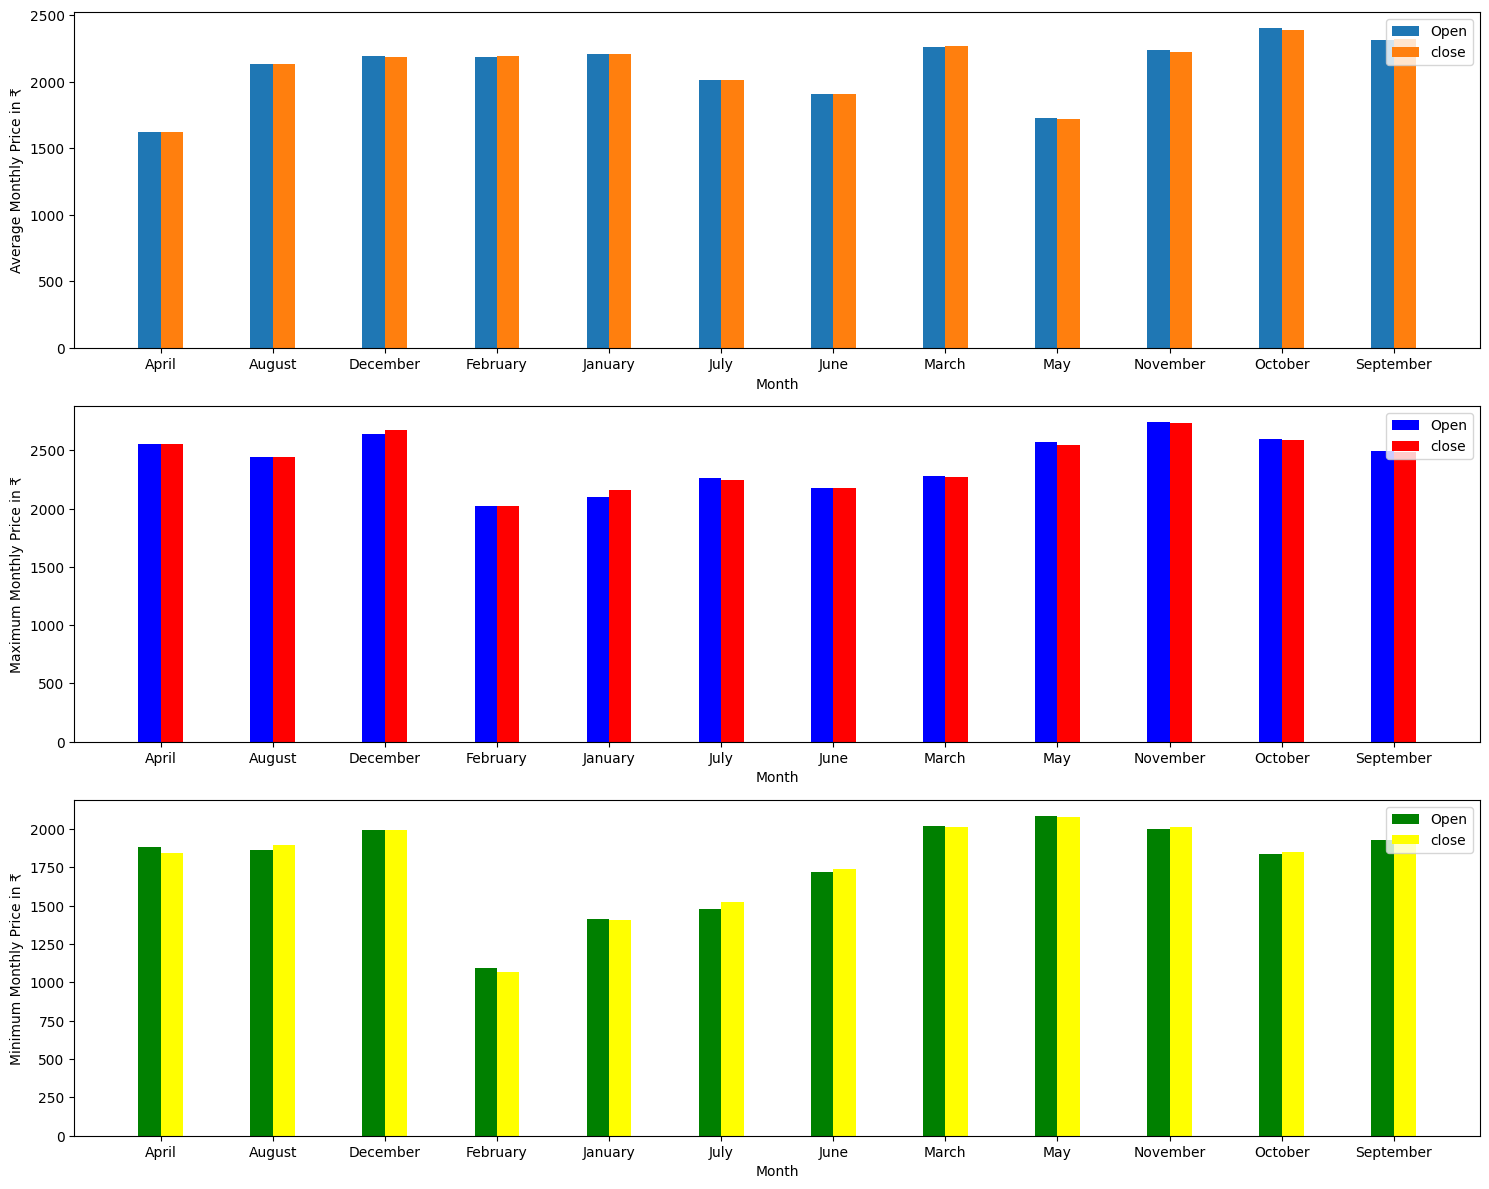

In [12]:
label = monthwise.index
x = np.arange(len(label))
width = 0.2
fig , (ax3,ax4,ax5) = plt.subplots(3,figsize = (15,12))
ax3.bar(x-width/2, monthwise['open'],width,label = 'Open' )
ax3.bar(x+width/2,monthwise['close'],width, label = 'close')
ax3.set_xlabel('Month')
ax3.set_ylabel('Average Monthly Price in ₹')
ax3.set_xticks(x)
ax3.set_xticklabels(label)
ax3.legend( loc='upper right')

ax4.bar(x-width/2, monthwise_max['open'],width,label = 'Open',color = 'blue' )
ax4.bar(x+width/2,monthwise_max['close'],width, label = 'close',color = 'red')
ax4.set_xlabel('Month')
ax4.set_ylabel('Maximum Monthly Price in ₹')
ax4.set_xticks(x)
ax4.set_xticklabels(label)
ax4.legend( loc='upper right')


ax5.bar(x-width/2, monthwise_min['open'],width,label = 'Open',color = 'green' )
ax5.bar(x+width/2,monthwise_min['close'],width, label = 'close',color = 'yellow')
ax5.set_xlabel('Month')
ax5.set_ylabel('Minimum Monthly Price in ₹')
ax5.set_xticks(x)
ax5.set_xticklabels(label)
ax5.legend( loc='upper right')

fig.tight_layout()

#### Checking for Stationarity of Time Series

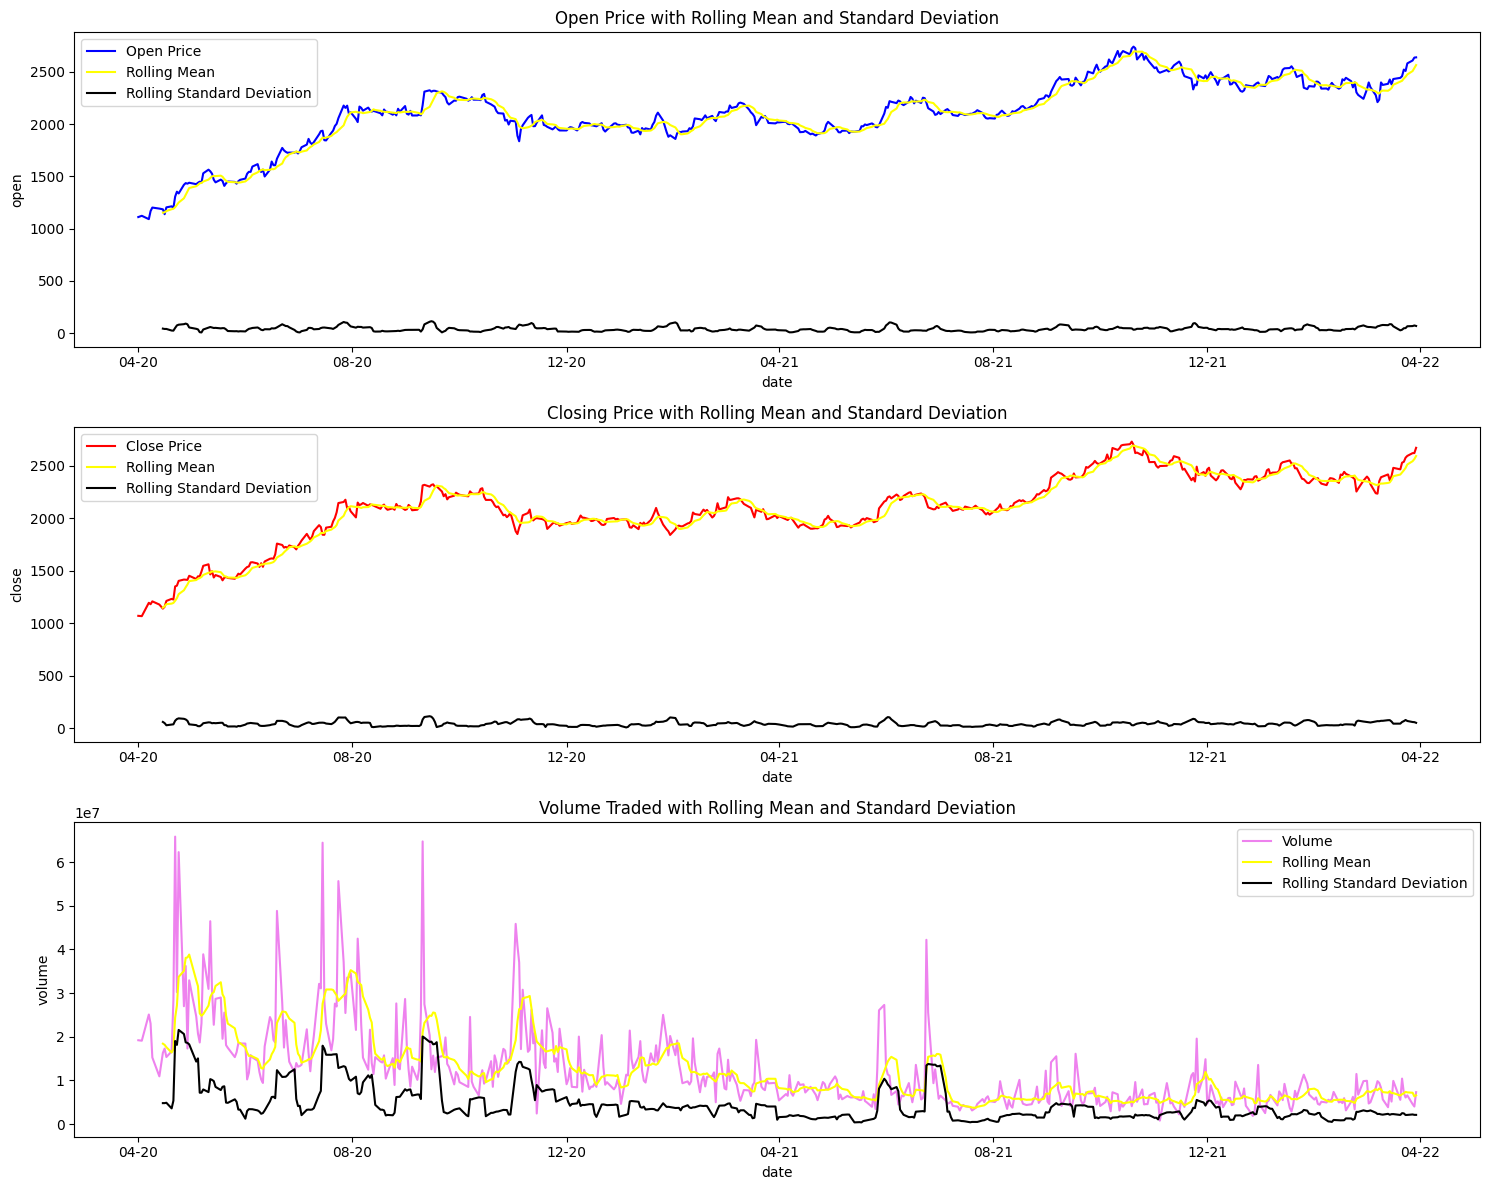

In [13]:
rolling_window = 7
fig,(ax,ax1,ax2) = plt.subplots(3,figsize = (15,12))
sns.lineplot( x = df['date'], y = df['open'] , ax = ax, color = 'blue' ,label = 'Open Price')
sns.lineplot(x = df['date'], y = df['open'].rolling(rolling_window).mean(), ax = ax,color = 'yellow',label = 'Rolling Mean' )
sns.lineplot(x = df['date'], y = df['open'].rolling(rolling_window).std(), ax = ax,color = 'black' , label = 'Rolling Standard Deviation' )
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))
ax.set_title('Open Price with Rolling Mean and Standard Deviation')
ax.legend(loc = 'upper left')


sns.lineplot( x = df['date'], y = df['close'] , ax = ax1, color = 'red' ,label = 'Close Price')
sns.lineplot(x = df['date'], y = df['close'].rolling(rolling_window).mean(), ax = ax1,color = 'yellow',label = 'Rolling Mean' )
sns.lineplot(x = df['date'], y = df['close'].rolling(rolling_window).std(), ax = ax1,color = 'black' , label = 'Rolling Standard Deviation' )
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))
ax1.set_title('Closing Price with Rolling Mean and Standard Deviation')
ax1.legend(loc = 'upper left')

sns.lineplot( x = df['date'], y = df['volume'] , ax = ax2, color = 'violet' ,label = 'Volume')
sns.lineplot(x = df['date'], y = df['volume'].rolling(rolling_window).mean(), ax = ax2,color = 'yellow',label = 'Rolling Mean' )
sns.lineplot(x = df['date'], y = df['volume'].rolling(rolling_window).std(), ax = ax2,color = 'black' , label = 'Rolling Standard Deviation' )
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))
ax2.set_title('Volume Traded with Rolling Mean and Standard Deviation')
ax2.legend(loc = 'upper right')


fig.tight_layout()

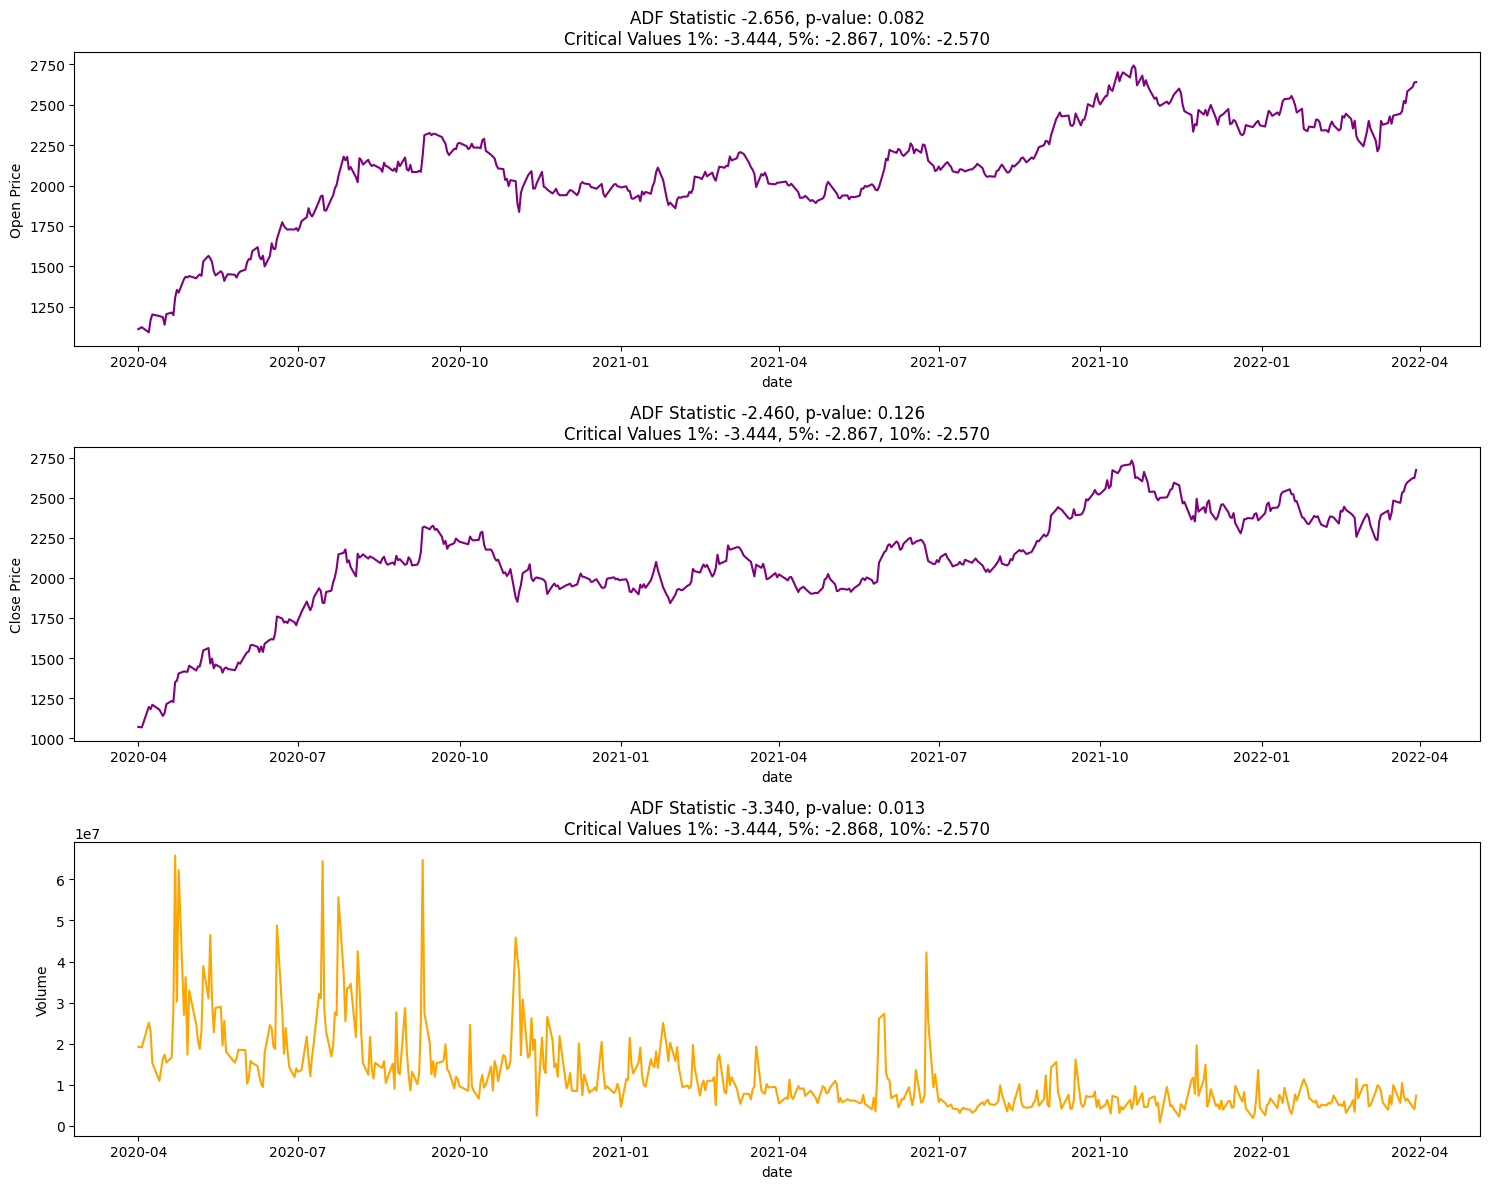

In [14]:
#AUDF test
fig , (ax,ax1,ax2) = plt.subplots(3,figsize = (15,12))
def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'green' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df['date'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}')
    ax.set_ylabel(ylabel=title)

visualize_adfuller_results(df['open'].values, 'Open Price', ax)
visualize_adfuller_results(df['close'].values, 'Close Price', ax1)
visualize_adfuller_results(df['volume'].values, 'Volume', ax2)

fig.tight_layout()


## Univariate Time Series Modelling
### Using Opening Price as Feature

In [15]:
train_size = int(0.8*len(df))
test_size = len(df) - train_size
sequence_length = 50

scaler = MinMaxScaler()
data = df.filter(['open'])
scaled_data = scaler.fit_transform(data)


train_data = scaled_data[0:train_size,:]
test_data = scaled_data[train_size-sequence_length:,:]

def create_train_test_split(data,sequence_length=1):
    x , y =  [] , []
    for i in range(sequence_length , data.shape[0]):
        x.append(data[i-sequence_length:i,0])
        y.append(data[i,0])
    return np.array(x),np.array(y)

x_train_uni ,y_train_uni = create_train_test_split(train_data,sequence_length)
x_test_uni , y_test_uni = create_train_test_split(test_data,sequence_length)

x_train_uni = np.reshape(x_train_uni,(x_train_uni.shape[0],1,x_train_uni.shape[1]))
x_test_uni = np.reshape(x_test_uni,(x_test_uni.shape[0],1,x_test_uni.shape[1]))




#### LSTM Modelling

In [16]:
model_LSTM = Sequential()

n_neurons = x_train_uni.shape[1] * x_train_uni.shape[2]
print(n_neurons, x_train_uni.shape[1], x_train_uni.shape[2])
model_LSTM.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train_uni.shape[1], x_train_uni.shape[2]))) 
model_LSTM.add(LSTM(n_neurons, return_sequences=False))
model_LSTM.add(Dense(10))
model_LSTM.add(Dense(1))

model_LSTM.compile(optimizer = 'adam' , loss = 'mean_squared_error')

modeler = model_LSTM.fit(x_train_uni,y_train_uni,batch_size = 16,epochs = 20,validation_data = (x_test_uni,y_test_uni))



50 1 50
Epoch 1/20
22/22 [==============================] - 1s 16ms/step - loss: 0.1246 - val_loss: 0.0309
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.0117 - val_loss: 0.0040
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.0063
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0032
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0025
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0030
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0087
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0067
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0050
Epoch 10/20
22/22 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.0080
Epoch 11/2

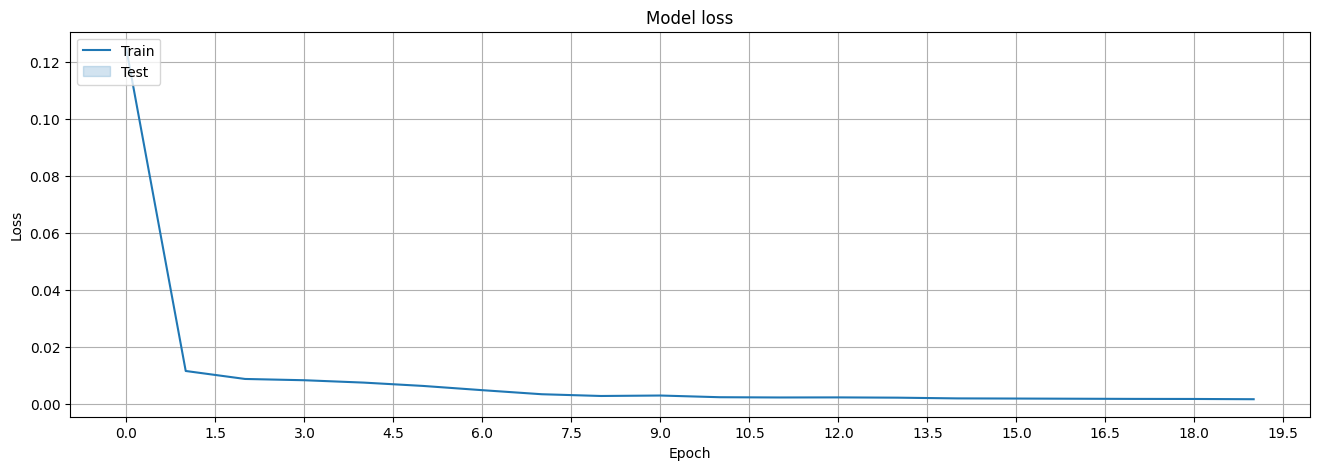

In [17]:
epochs = 20
fig, ax = plt.subplots(figsize=(16, 5), sharex=True)
sns.lineplot(data=modeler.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

In [18]:
Scaled_prediction_LSTM = model_LSTM.predict(x_test_uni)

test_Pred_LSTM = scaler.inverse_transform(Scaled_prediction_LSTM)
y_test_unscaled_LSTM = scaler.inverse_transform(y_test_uni.reshape(-1,1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled_LSTM, test_Pred_LSTM)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled_LSTM, test_Pred_LSTM)/ y_test_unscaled_LSTM))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled_LSTM, test_Pred_LSTM)/ y_test_unscaled_LSTM)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')



4/4 [==============================] - 0s 1ms/step
Median Absolute Error (MAE): 90.32
Mean Absolute Percentage Error (MAPE): 3.69 %
Median Absolute Percentage Error (MDAPE): 3.91 %


<Axes: >

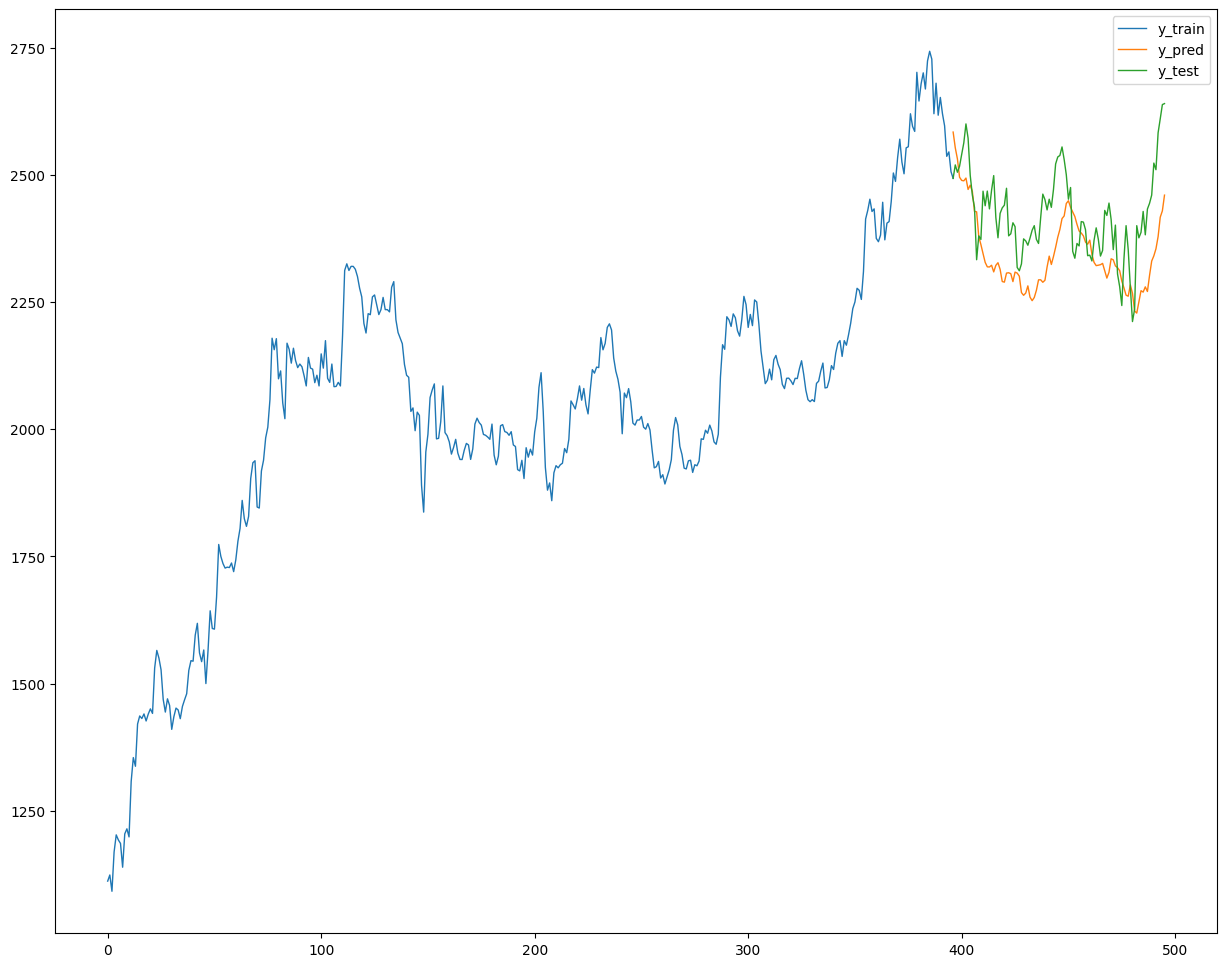

In [19]:

train = pd.DataFrame(df['open'][:train_size+1]).rename(columns={'open':'y_train'})
test = pd.DataFrame(df['open'][train_size:]).rename(columns={'open':'y_test'})
test.insert(1,"y_pred",test_Pred_LSTM,True)
df_pred = pd.concat([train,test])

fig, ax6 = plt.subplots(figsize = (15,12))
sns.lineplot(data = df_pred[['y_train','y_pred','y_test']],linewidth = 1.0,dashes = False,ax = ax6)



In [20]:
opening_price_today = np.round(df['open'].iloc[-1],2)
pred_opening_price_LSTM = np.round(test_Pred_LSTM.ravel()[0],2)
change_percent = np.round(100 - (opening_price_today * 100)/pred_opening_price_LSTM, 2)

end_date = df.index[-1]

plus = '+'; minus = ''
print(f'The Opening Price for Reliance Industries at {end_date} was ₹{opening_price_today}')
print(f'The predicted Opening price by LSTM Time Series Modelling is ₹{pred_opening_price_LSTM} ({plus if change_percent > 0 else minus}{change_percent}%)')


The Opening Price for Reliance Industries at 495 was ₹2639.9
The predicted Opening price by LSTM Time Series Modelling is ₹2583.9599609375 (-2.16%)


#### Multivariate Time Series Analysis
##### Using Opening Price, Closing Price, High, Low, and Volume Traded as Features

In [21]:
multivariate_df = df.copy()
multivariate_df.drop(['adj_close'],axis = 1,inplace = True)
multivariate_df.set_index('date',inplace=True)

In [22]:
multivariate_unscaled_data = np.array(multivariate_df)
multivariate_unscaled_data = np.reshape(multivariate_unscaled_data,(multivariate_df.shape[0],-1))
multivariate_unscaled_data

multi_scaler = MinMaxScaler()
multivariate_scaled_data = multi_scaler.fit_transform(multivariate_unscaled_data)

## Scaling Predictions
multi_pred_scaler = MinMaxScaler()
df_open = pd.DataFrame(df['open'])
df_open_scaled = multi_pred_scaler.fit_transform(df_open)

In [23]:
sequence_length = 50

multi_train_size = int(0.8*len(multivariate_scaled_data))

multi_train_data = multivariate_scaled_data[0:multi_train_size,:]
multi_test_data = multivariate_scaled_data[multi_train_size-sequence_length:,:]

def create_train_test_split_multi(data_multi,sequence_length=1):
    X , Y =  [] , []
    for i in range(sequence_length , data_multi.shape[0]):
        X.append(data_multi[i-sequence_length:i,:])
        Y.append(data_multi[i,0])
    return np.array(X),np.array(Y)

multi_x_train , multi_y_train = create_train_test_split_multi(multi_train_data,sequence_length)
multi_x_test , multi_y_test = create_train_test_split_multi(multi_test_data,sequence_length)

print(multi_x_train.shape,multi_y_train.size)
print(multi_x_test.shape, multi_y_test.shape)



(346, 50, 5) 346
(100, 50, 5) (100,)


In [24]:
multi_model = Sequential()

multi_n_neurons = multi_x_train.shape[1] * multi_x_train.shape[2]
multi_model.add(LSTM(multi_n_neurons,return_sequences=True,input_shape = (multi_x_train.shape[1] , multi_x_train.shape[2])))
multi_model.add(LSTM(multi_n_neurons,return_sequences=False))
multi_model.add(Dense(40))
multi_model.add(Dense(1))

multi_model.compile(optimizer='adam',loss = 'mse')


multi_epochs = 60


In [25]:
multi_modeler = multi_model.fit(multi_x_train,multi_y_train,batch_size=16,epochs = multi_epochs,validation_data=(multi_x_test,multi_y_test))

Epoch 1/60
22/22 [==============================] - 4s 115ms/step - loss: 0.0342 - val_loss: 0.0053
Epoch 2/60
22/22 [==============================] - 2s 99ms/step - loss: 0.0027 - val_loss: 0.0017
Epoch 3/60
22/22 [==============================] - 2s 80ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 4/60
22/22 [==============================] - 2s 91ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 5/60
22/22 [==============================] - 2s 82ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 6/60
22/22 [==============================] - 2s 81ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 7/60
22/22 [==============================] - 2s 81ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 8/60
22/22 [==============================] - 2s 82ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 9/60
22/22 [==============================] - 2s 80ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 10/60
22/22 [==============================] - 2s 84ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 11

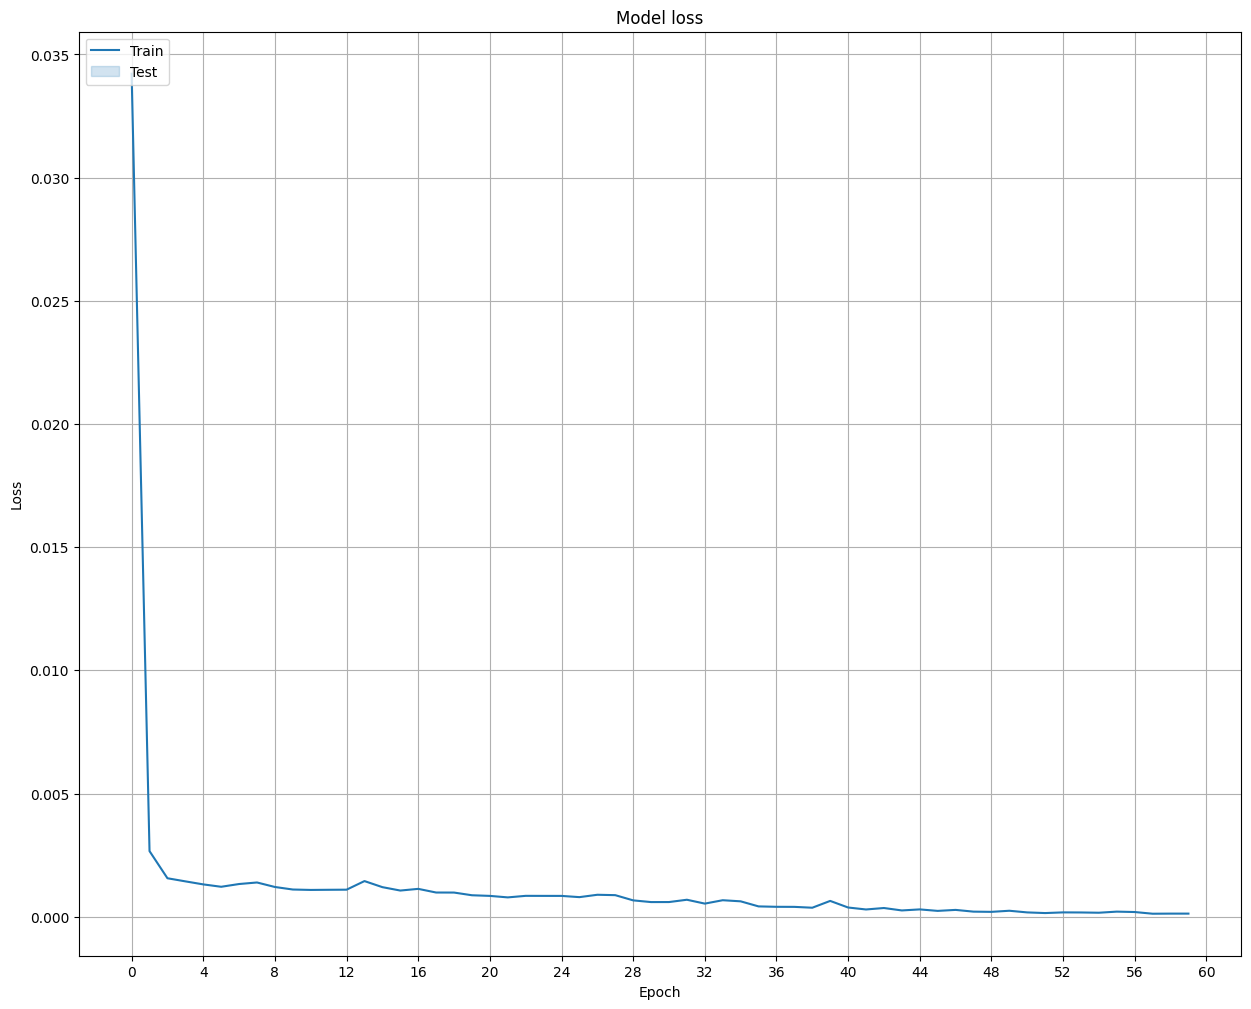

In [26]:
fig,ax8 = plt.subplots(figsize = (15,12))

epochs_multi = 20

sns.lineplot(data=multi_modeler.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax8.xaxis.set_major_locator(plt.MaxNLocator(epochs_multi))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

In [27]:
Scaled_prediction_multi = multi_model.predict(multi_x_test)

test_Pred_multi = multi_pred_scaler.inverse_transform(Scaled_prediction_multi)
y_test_unscaled_multi = multi_pred_scaler.inverse_transform(multi_y_test.reshape(-1,1))



4/4 [==============================] - 0s 22ms/step


In [28]:
# Mean Absolute Error (MAE)
MAE_multi = mean_absolute_error(y_test_unscaled_multi, test_Pred_multi)
print(f'Median Absolute Error (MAE): {np.round(MAE_multi, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE_multi = np.mean((np.abs(np.subtract(y_test_unscaled_multi, test_Pred_multi)/ y_test_unscaled_multi))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE_multi, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE_multi = np.median((np.abs(np.subtract(y_test_unscaled_multi, test_Pred_multi)/ y_test_unscaled_multi)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE_multi, 2)} %')

Median Absolute Error (MAE): 21.85
Mean Absolute Percentage Error (MAPE): 0.91 %
Median Absolute Percentage Error (MDAPE): 0.86 %


<Axes: >

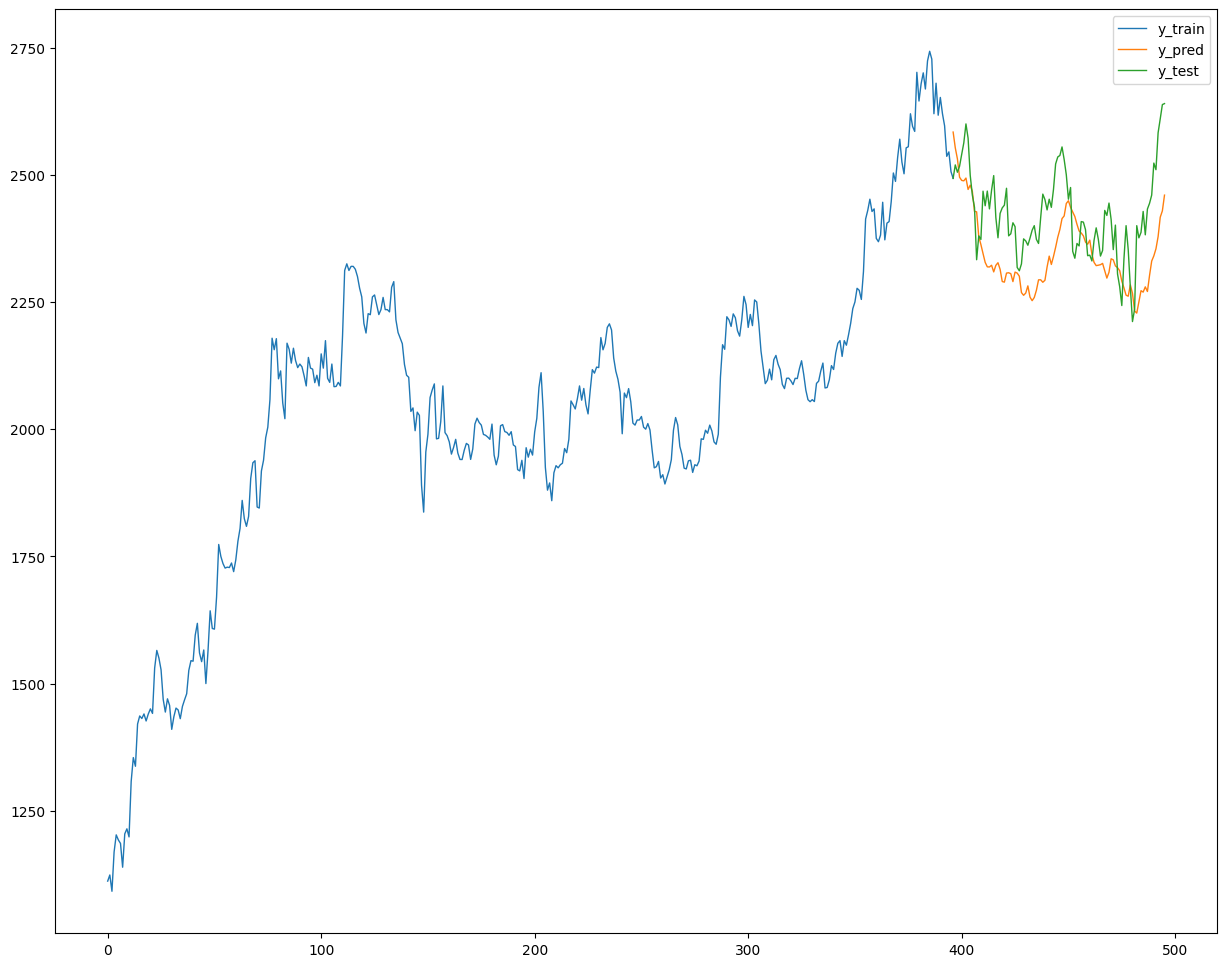

In [29]:

multi_train = pd.DataFrame(df['open'][:multi_train_size+1]).rename(columns={'open':'y_train'})
test = pd.DataFrame(df['open'][multi_train_size:]).rename(columns={'open':'y_test'})
test.insert(1,"y_pred",test_Pred_multi,True)
df_pred_multi = pd.concat([train,test])

fig, ax9 = plt.subplots(figsize = (15,12))
sns.lineplot(data = df_pred[['y_train','y_pred','y_test']],linewidth = 1.0,dashes = False,ax = ax9)



In [30]:
pred_opening_price_multi = np.round(test_Pred_multi.ravel()[0],2)
change_percent_multi = np.round(100 - (opening_price_today * 100)/pred_opening_price_multi, 2)

end_date = df.index[-1]

plus = '+'; minus = ''
print(f'The Opening Price for Reliance Industries at {end_date} was ₹{opening_price_today}')
print(f'The predicted Opening price by LSTM Time Series Modelling is ₹{pred_opening_price_multi} ({plus if change_percent_multi > 0 else minus}{change_percent_multi}%)')


The Opening Price for Reliance Industries at 495 was ₹2639.9
The predicted Opening price by LSTM Time Series Modelling is ₹2468.260009765625 (-6.95%)
